## Clusterização Baseada em Densidade na Prática

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

In [7]:
data = pd.read_csv('data/tamanho_pinguins.csv')
data.sample(5)

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
199,Chinstrap,Dream,49.0,19.6,212.0,4300.0,MALE
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,FEMALE
151,Adelie,Dream,41.5,18.5,201.0,4000.0,MALE
243,Gentoo,Biscoe,46.3,15.8,215.0,5050.0,MALE
208,Chinstrap,Dream,45.2,16.6,191.0,3250.0,FEMALE


In [8]:
data.isnull().sum()

especie          0
ilha             0
comp_bico_mm     2
larg_bico_mm     2
comp_asa_mm      2
peso_gr          2
sexo            10
dtype: int64

In [9]:
data = data.dropna()

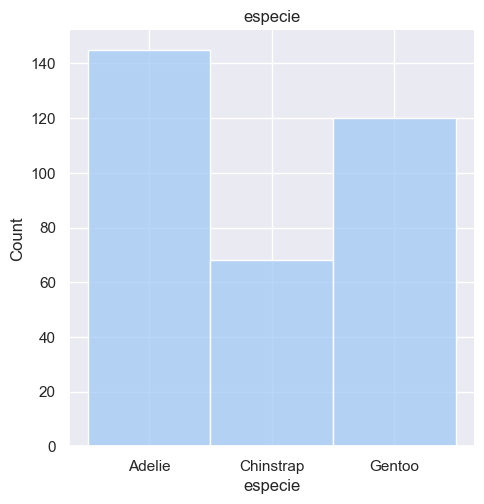

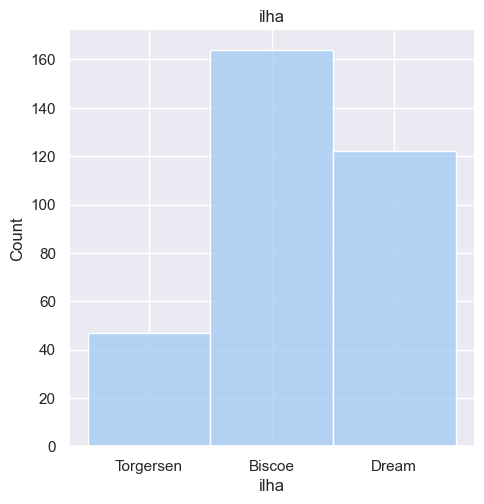

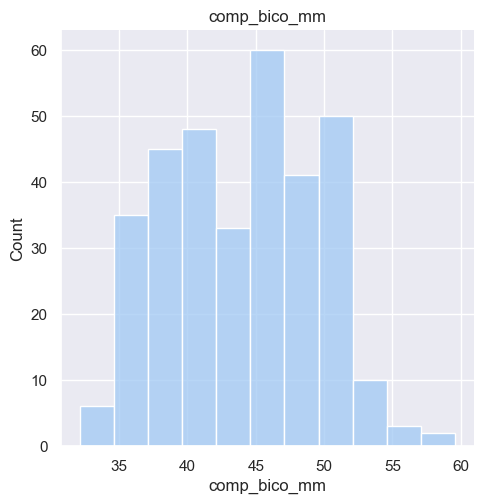

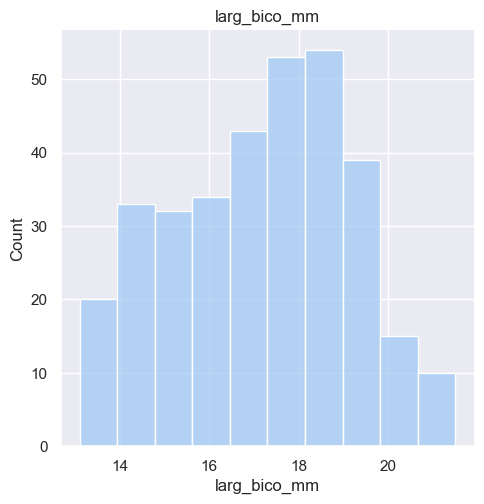

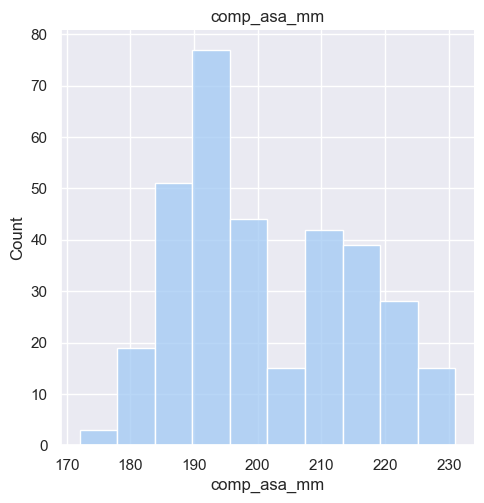

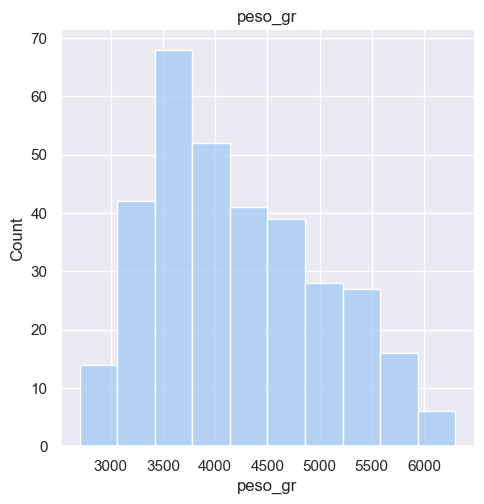

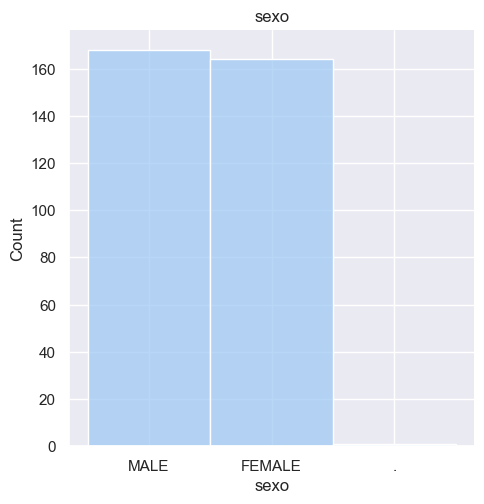

In [12]:
for c in data.columns:
    sns.displot(data[c]).set(title=c)
    plt.plot();

In [16]:
# excluir outlier
data = data[data.larg_bico_mm < 50]

In [17]:
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [18]:
x = X_[:, [0,2]]

In [20]:
db = DBSCAN(eps=.06, min_samples=7)
db.fit(x)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)

Número de Clusters: 3
Número de Ruídos: 28


In [21]:
df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels

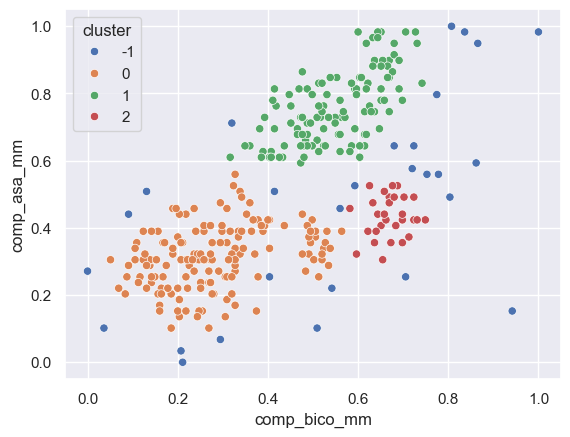

In [22]:
sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");

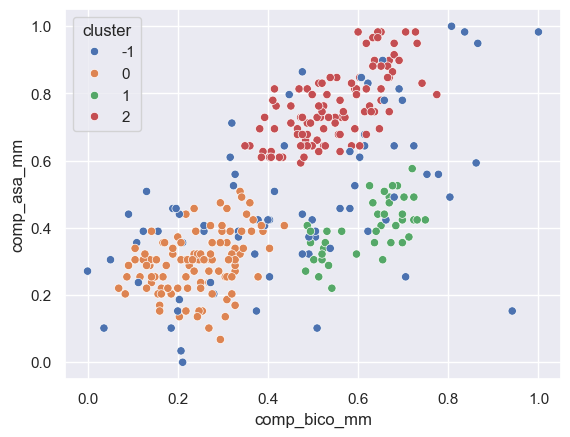

In [25]:
db = DBSCAN(eps=.1, min_samples=3).fit(X_)
labels = db.labels_

df_db = pd.DataFrame(x, columns = ['comp_bico_mm', 'comp_asa_mm'])
df_db['cluster'] = labels

sns.scatterplot(data=df_db, 
                x="comp_bico_mm", 
                y="comp_asa_mm", 
                hue="cluster", 
                palette="deep");